**Scrapping Data**

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00


**Import Library yang Diperlukan**

In [ ]:
from google_play_scraper import app, reviews, Sort
import pandas as pd
import numpy as np

# Ganti dengan ID aplikasi dari Google Play Store (contoh: 'com.gojek.app' untuk aplikasi Gojek)
app_id = 'id.go.kpu.sirekap2024'  # Gantilah dengan ID aplikasi Sirekap

# Mengambil ulasan aplikasi
result, _ = reviews(
    app_id,
    lang='id',  # Mengambil ulasan dalam bahasa Indonesia
    country='id',  # Negara Indonesia
    sort=Sort.NEWEST,  # Mengurutkan berdasarkan ulasan terbaru
    count=41000  # Jumlah ulasan yang ingin diambil
)

# Mengonversi hasil ulasan ke DataFrame Pandas
df = pd.DataFrame(result)

# Mengekspor DataFrame ke format CSV
df.to_csv('sirekap_reviews.csv', index=False)

print("Data berhasil diekspor ke 'sirekap_reviews.csv'")

Data berhasil diekspor ke 'sirekap_reviews.csv'


In [ ]:
df_busu = pd.DataFrame(np.array(result), columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,105c92ef-fbcd-4d67-a111-f4b7038d2a0d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sirekap pilkada belum bisa diupdate dr versi l...,4,0,2.73,2024-12-17 22:24:22,None,None,2.73
1,eb02aa9f-83d2-44bb-98e8-54fb6753037b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,2.73,2024-12-17 16:46:36,None,None,2.73
2,bd70f377-4087-442e-b6ea-f17e73761ba0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terbaik,3,0,2.73,2024-12-12 01:13:58,None,None,2.73
3,dc13c086-e9d2-403c-bc18-c6aaa80a966d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,0,2.73,2024-12-11 01:53:31,None,None,2.73
4,a5adc232-3f9c-4957-a05e-d0a3d527bf02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu tugas KPPS dalam menghitung pe...,5,0,2.73,2024-12-05 00:29:33,None,None,2.73


**Jumlah Data yang Didapatkan**

In [ ]:
len(df_busu.index)

21666

**Memanggil Kolom yang Perlu**

In [ ]:
df_busu[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,4,2024-12-17 22:24:22,Sirekap pilkada belum bisa diupdate dr versi l...
1,Pengguna Google,5,2024-12-17 16:46:36,sangat membantu sekali
2,Pengguna Google,3,2024-12-12 01:13:58,Terbaik
3,Pengguna Google,5,2024-12-11 01:53:31,Pengalaman saya di pilkada 2024 yg kebetulan s...
4,Pengguna Google,5,2024-12-05 00:29:33,Sangat membantu tugas KPPS dalam menghitung pe...


In [ ]:
new_df = df_busu[['userName', 'score', 'at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
0,Pengguna Google,4,2024-12-17 22:24:22,Sirekap pilkada belum bisa diupdate dr versi l...
1,Pengguna Google,5,2024-12-17 16:46:36,sangat membantu sekali
2,Pengguna Google,3,2024-12-12 01:13:58,Terbaik
3,Pengguna Google,5,2024-12-11 01:53:31,Pengalaman saya di pilkada 2024 yg kebetulan s...
4,Pengguna Google,5,2024-12-05 00:29:33,Sangat membantu tugas KPPS dalam menghitung pe...


**Menyimpan ke Variabel My_DF**

In [ ]:
my_df = sorted_df[['userName', 'score', 'at', 'content']]

In [ ]:
my_df = my_df[['content', 'score']]

In [ ]:
my_df.head()

,content,score
0,Sirekap pilkada belum bisa diupdate dr versi l...,4
1,sangat membantu sekali,5
2,Terbaik,3
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5
4,Sangat membantu tugas KPPS dalam menghitung pe...,5


**Pelabelan**

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"[sirekap, pilkada, diupdate, dr, versi]",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,[membantu],bantu
2,Terbaik,3,None,terbaik,terbaik,[terbaik],baik
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"[pengalaman, pilkada, yg, memegang, sirekap, b...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"[membantu, tugas, kpps, menghitung, perolehan,...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"[sirekap, berjalan, sesuai, yg, harapkan, pas,...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,[testo],testo
7,👍,5,Positif,,,[],
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"[ungah, daftar, gak]",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"[aplikasi, sirekap, pilpres, saran, kamera, se...",aplikasi sirekap pilpres saran kamera setting ...


In [ ]:
my_df.to_csv('scrapped_data.csv', index=False)

**Cleaning Data**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"['sirekap', 'pilkada', 'diupdate', 'dr', 'versi']",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,['membantu'],bantu
2,Terbaik,3,NaN,terbaik,terbaik,['terbaik'],baik
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"['pengalaman', 'pilkada', 'yg', 'memegang', 's...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"['membantu', 'tugas', 'kpps', 'menghitung', 'p...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"['sirekap', 'berjalan', 'sesuai', 'yg', 'harap...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,['testo'],testo
7,👍,5,Positif,NaN,NaN,[],NaN
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"['ungah', 'daftar', 'gak']",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"['aplikasi', 'sirekap', 'pilpres', 'saran', 'k...",aplikasi sirekap pilpres saran kamera setting ...


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21666 entries, 0 to 21665
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         21666 non-null  object
 1   score           21666 non-null  int64 
 2   Label           20575 non-null  object
 3   text_clean      21543 non-null  object
 4   text_StopWord   21231 non-null  object
 5   text_tokens     21666 non-null  object
 6   text_steamindo  21231 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [ ]:
my_df.isna() #tampilkan setiap baris yang memiliki nilai null pada kolom apapun

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
21661,False,False,False,False,False,False,False
21662,False,False,False,False,False,False,False
21663,False,False,False,False,False,False,False
21664,False,False,False,False,False,False,False


In [ ]:
my_df.isna().any()

,0
content,False
score,False
Label,True
text_clean,True
text_StopWord,True
text_tokens,False
text_steamindo,True


In [ ]:
my_df.describe()

,score
count,21666.000000
mean,1.940967
std,1.540701
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
my_df.isnull().sum() #mencari jumlah baris yang bernilai null

,0
content,0
score,0
Label,1091
text_clean,123
text_StopWord,435
text_tokens,0
text_steamindo,435


**Handling Missing value-Ignore Tuple**

In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0
text_clean,122
text_StopWord,419
text_tokens,0
text_steamindo,419


In [ ]:
my_df.head(50)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"['sirekap', 'pilkada', 'diupdate', 'dr', 'versi']",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,['membantu'],bantu
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"['pengalaman', 'pilkada', 'yg', 'memegang', 's...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"['membantu', 'tugas', 'kpps', 'menghitung', 'p...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"['sirekap', 'berjalan', 'sesuai', 'yg', 'harap...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,['testo'],testo
7,👍,5,Positif,NaN,NaN,[],NaN
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"['ungah', 'daftar', 'gak']",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"['aplikasi', 'sirekap', 'pilpres', 'saran', 'k...",aplikasi sirekap pilpres saran kamera setting ...
10,Baik,5,Positif,baik,NaN,[],NaN


In [ ]:
my_df.to_csv("sirekappreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama sirekappreprocessing.csv

**Text Processing**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sirekappreprocessing.csv')
df.head(50)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"['sirekap', 'pilkada', 'diupdate', 'dr', 'versi']",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,['membantu'],bantu
2,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"['pengalaman', 'pilkada', 'yg', 'memegang', 's...",alam pilkada yg pegang sirekap bagus cepat akurat
3,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"['membantu', 'tugas', 'kpps', 'menghitung', 'p...",bantu tugas kpps hitung oleh suara kendala nya...
4,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"['sirekap', 'berjalan', 'sesuai', 'yg', 'harap...",sirekap jalan sesuai yg harap pas milu moga yg...
5,testo,5,Positif,testo,testo,['testo'],testo
6,👍,5,Positif,NaN,NaN,[],NaN
7,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"['ungah', 'daftar', 'gak']",ungah daftar gak
8,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"['aplikasi', 'sirekap', 'pilpres', 'saran', 'k...",aplikasi sirekap pilpres saran kamera setting ...
9,Baik,5,Positif,baik,NaN,[],NaN


In [ ]:
filter = df[df['Label'] == 'Positif']
filter.shape

(4297, 7)

**Case Folding**

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"['sirekap', 'pilkada', 'diupdate', 'dr', 'versi']",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,['membantu'],bantu
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"['pengalaman', 'pilkada', 'yg', 'memegang', 's...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"['membantu', 'tugas', 'kpps', 'menghitung', 'p...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"['sirekap', 'berjalan', 'sesuai', 'yg', 'harap...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,['testo'],testo
7,👍,5,Positif,,NaN,[],NaN
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"['ungah', 'daftar', 'gak']",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"['aplikasi', 'sirekap', 'pilpres', 'saran', 'k...",aplikasi sirekap pilpres saran kamera setting ...
10,Baik,5,Positif,baik,NaN,[],NaN


**Stopword Removal**

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"['sirekap', 'pilkada', 'diupdate', 'dr', 'versi']",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,['membantu'],bantu
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"['pengalaman', 'pilkada', 'yg', 'memegang', 's...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"['membantu', 'tugas', 'kpps', 'menghitung', 'p...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"['sirekap', 'berjalan', 'sesuai', 'yg', 'harap...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,['testo'],testo
7,👍,5,Positif,,,[],NaN
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"['ungah', 'daftar', 'gak']",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"['aplikasi', 'sirekap', 'pilpres', 'saran', 'k...",aplikasi sirekap pilpres saran kamera setting ...
10,Baik,5,Positif,baik,,[],NaN


**Tokenizing**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
# Download the 'punkt_tab' data before calling word_tokenize
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"[sirekap, pilkada, diupdate, dr, versi]",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,[membantu],bantu
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"[pengalaman, pilkada, yg, memegang, sirekap, b...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"[membantu, tugas, kpps, menghitung, perolehan,...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"[sirekap, berjalan, sesuai, yg, harapkan, pas,...",sirekap jalan sesuai yg harap pas milu moga yg...


**Stemming**

Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

Output streaming akan dipotong hingga 5000 baris terakhir.
9682 : inipemerintah : inipemerintah
9683 : ajasimulasi : ajasimulasi
9684 : teruskalo : teruskalo
9685 : louncing : louncing
9686 : nyaapalagi : nyaapalagi
9687 : hseluruh : hseluruh
9688 : aplikasikenapa : aplikasikenapa
9689 : ilmu : ilmu
9690 : ianya : ianya
9691 : apktiap : apktiap
9692 : panas : panas
9693 : pakaiterlalu : pakaiterlalu
9694 : dipaksakanuntuk : dipaksakanuntuk
9695 : biasaudah : biasaudah
9696 : nasiaonal : nasiaonal
9697 : skla : skla
9698 : lokalan : lokal
9699 : dikhawatirkan : khawatir
9700 : peningkatannya : tingkat
9701 : gerak : gerak
9702 : blang : blang
9703 : ngagibeug : ngagibeug
9704 : kimm : kimm
9705 : pertam : tam
9706 : bise : bise
9707 : ancorrr : ancorrr
9708 : smwua : smwua
9709 : buy : buy
9710 : kesalahn : kesalahn
9711 : bugeror : bugeror
9712 : beresin : resin
9713 : clir : clir
9714 : oi : oi
9715 : asww : asww
9716 : angpa : angpa
9717 : ongkang : ongkang
9718 : siana : siana
9719 

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Sirekap pilkada belum bisa diupdate dr versi l...,4,Positif,sirekap pilkada belum bisa diupdate dr versi lama,sirekap pilkada diupdate dr versi,"[sirekap, pilkada, diupdate, dr, versi]",sirekap pilkada diupdate dr versi
1,sangat membantu sekali,5,Positif,sangat membantu sekali,membantu,[membantu],bantu
3,Pengalaman saya di pilkada 2024 yg kebetulan s...,5,Positif,pengalaman saya di pilkada yg kebetulan saya ...,pengalaman pilkada yg memegang sirekap bagus c...,"[pengalaman, pilkada, yg, memegang, sirekap, b...",alam pilkada yg pegang sirekap bagus cepat akurat
4,Sangat membantu tugas KPPS dalam menghitung pe...,5,Positif,sangat membantu tugas kpps dalam menghitung pe...,membantu tugas kpps menghitung perolehan suara...,"[membantu, tugas, kpps, menghitung, perolehan,...",bantu tugas kpps hitung oleh suara kendala nya...
5,Untuk sekarang sirekap berjalan sesuai dengan ...,5,Positif,untuk sekarang sirekap berjalan sesuai dengan ...,sirekap berjalan sesuai yg harapkan pas pemilu...,"[sirekap, berjalan, sesuai, yg, harapkan, pas,...",sirekap jalan sesuai yg harap pas milu moga yg...
6,testo,5,Positif,testo,testo,[testo],testo
7,👍,5,Positif,,,[],
8,Kenapa ungah daftar gak bisa,5,Positif,kenapa ungah daftar gak bisa,ungah daftar gak,"[ungah, daftar, gak]",ungah daftar gak
9,Aplikasi sudah lebih baik daripada sirekap pil...,5,Positif,aplikasi sudah lebih baik daripada sirekap pil...,aplikasi sirekap pilpres saran kamera setting ...,"[aplikasi, sirekap, pilpres, saran, kamera, se...",aplikasi sirekap pilpres saran kamera setting ...
10,Baik,5,Positif,baik,,[],


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_sirekap.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

**Splitting Data**

memecah data test 20% dari keseluruhan data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17332,)
(17332,)
(4334,)
(4334,)


pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17332,)
(17332,)
(4334,)
(4334,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [88]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="weighted", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="weighted", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="weighted", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_sirekap.csv')

#

MultinomialNB Accuracy: 0.9047387606318348
MultinomialNB Precision: 0.9038627642507076
MultinomialNB Recall: 0.9047387606318348
MultinomialNB f1_score: 0.896839878704201
confusion_matrix:
 [[3245   57]
 [ 335  478]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


              precision    recall  f1-score   support

     Negatif       0.91      0.98      0.94      3302
     Positif       0.89      0.59      0.71       813

    accuracy                           0.90      4115
   macro avg       0.90      0.79      0.83      4115
weighted avg       0.90      0.90      0.90      4115



<ipython-input-78-83d835c10f14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x='Label', palette='viridis')


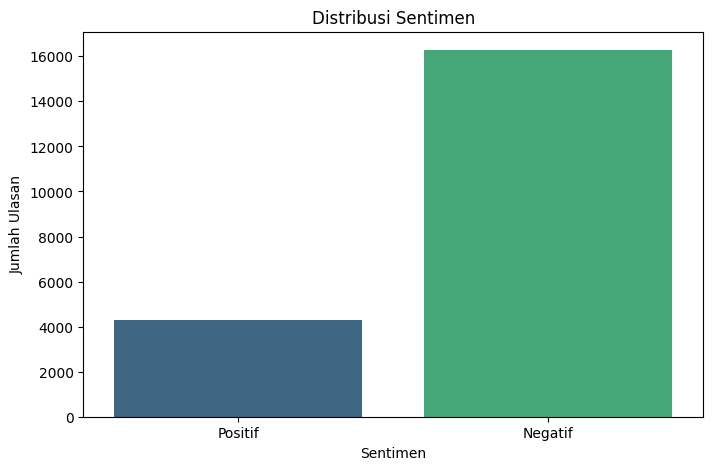

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagram distribusi sentimen
plt.figure(figsize=(8, 5))
sns.countplot(data=data_clean, x='Label', palette='viridis')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

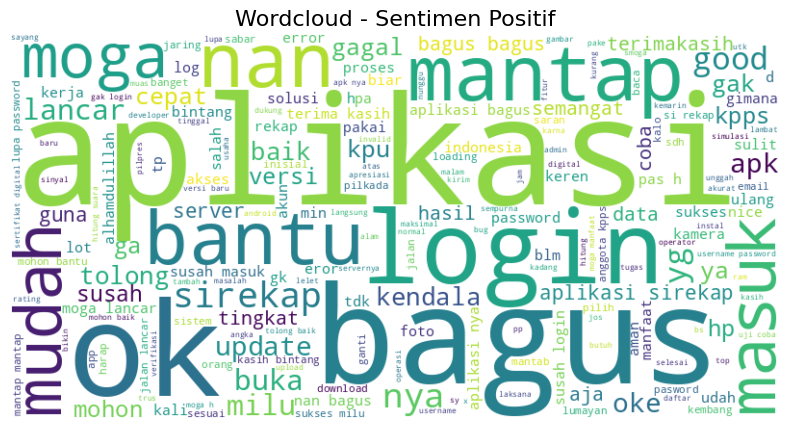

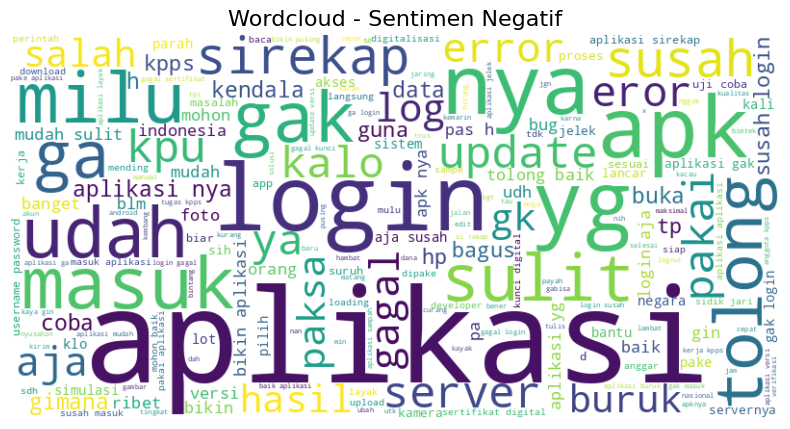

In [ ]:
from wordcloud import WordCloud

# Gabungkan teks dari ulasan positif, netral, dan negatif
positive_reviews = ' '.join(data_clean[data_clean['Label'] == 'Positif']['text_steamindo'].astype(str))
negative_reviews = ' '.join(data_clean[data_clean['Label'] == 'Negatif']['text_steamindo'].astype(str))

# Membuat WordCloud untuk setiap sentimen
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

create_wordcloud(positive_reviews, 'Wordcloud - Sentimen Positif')
create_wordcloud(negative_reviews, 'Wordcloud - Sentimen Negatif')

<Figure size 800x600 with 0 Axes>

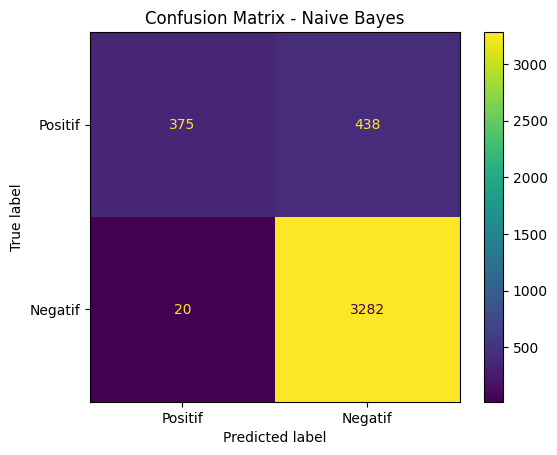

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positif', 'Negatif'])

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

**Menggunakan Algoritma SVM**

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=10, max_iter=10000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10, kernel='linear', max_iter=10000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7533414337788579


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Negatif       0.94      0.74      0.83      3302
     Positif       0.43      0.81      0.57       813

    accuracy                           0.75      4115
   macro avg       0.69      0.78      0.70      4115
weighted avg       0.84      0.75      0.78      4115



<Figure size 800x600 with 0 Axes>

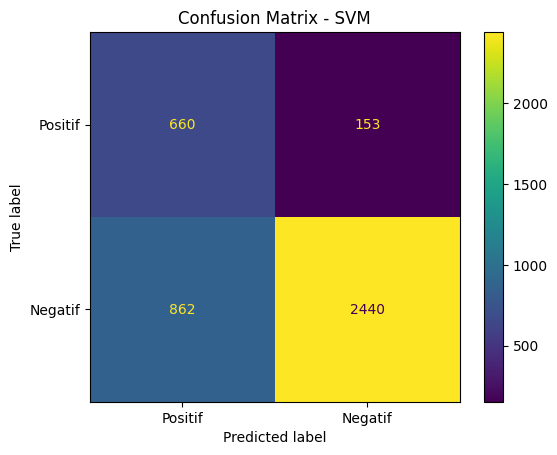

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['Positif', 'Negatif'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix - SVM')
plt.show()

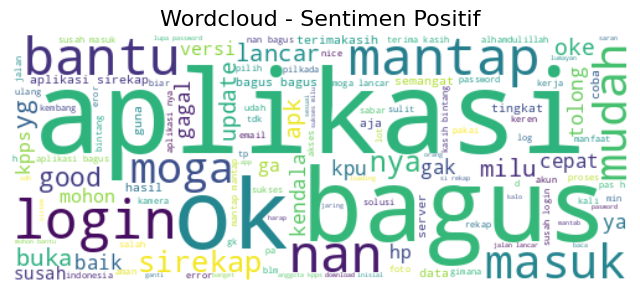

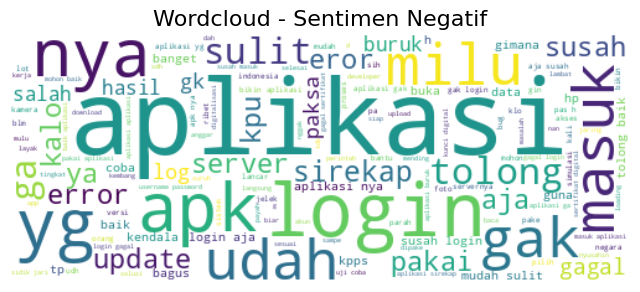

In [ ]:
positive_reviews = ' '.join(data_clean[data_clean['Label'] == 'Positif']['text_steamindo'].astype(str))
negative_reviews = ' '.join(data_clean[data_clean['Label'] == 'Negatif']['text_steamindo'].astype(str))

# Membuat WordCloud untuk setiap sentimen
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

create_wordcloud(positive_reviews, 'Wordcloud - Sentimen Positif')
create_wordcloud(negative_reviews, 'Wordcloud - Sentimen Negatif')
